# **Hybrid CNN-FNN Classifier on MNIST Dataset**

## Loading Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from tabulate import tabulate

## Loading Dataset

In [2]:
# Loading Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to the range of 0 to 1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

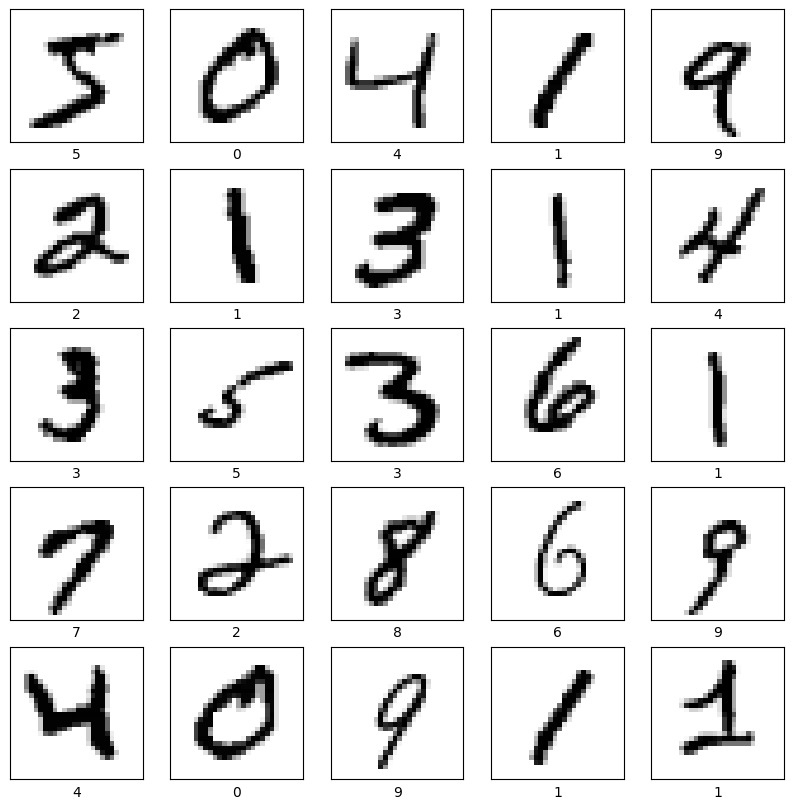

In [3]:
# Visualize few samples from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Defining the Hybrid CNN-FNN Model

In [4]:
# model = models.Sequential()

# # CNN layers
# # model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# # model.add(layers.MaxPooling2D((2, 2)))

# # Flatten the output from the convolutional layers
# model.add(layers.Flatten())

# # FNN layers
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(10, activation='softmax'))


# Defining the Hybrid CNN-FNN Model
model = models.Sequential()

# CNN layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# FNN layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\witby\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8466 - loss: 0.4548 - val_accuracy: 0.9884 - val_loss: 0.0378
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9790 - loss: 0.0708 - val_accuracy: 0.9913 - val_loss: 0.0299
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9833 - loss: 0.0588 - val_accuracy: 0.9926 - val_loss: 0.0235
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9867 - loss: 0.0460 - val_accuracy: 0.9933 - val_loss: 0.0216
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9880 - loss: 0.0452 - val_accuracy: 0.9920 - val_loss: 0.0278
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9905 - loss: 0.0362 - val_accuracy: 0.9902 - val_loss: 0.0359
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9895 - loss: 0.0396 - val_accuracy: 0.9930 - val_loss: 0.0307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9901 -

## Saving the model

In [7]:
# Save the model architecture as JSON
model_json = model.to_json()
with open("hybrid_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights with the correct filename
model.save_weights("hybrid_model_weights.weights.h5")

print("Model weights saved to disk.")


# # To Load Model ::
# # Load the JSON file that contains the model architecture
# with open('fnn_model.json', 'r') as json_file:
#     loaded_model_json = json_file.read()

# # Reconstruct the model from the JSON file
# loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# # Load the saved weights into the model
# loaded_model.load_weights("fnn_model_weights.h5")

# print("Model loaded from disk.")



Model weights saved to disk.


## Evaluating the Model Predictions

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc*100:.2f}%')

313/313 - 3s - 10ms/step - accuracy: 0.9939 - loss: 0.0239
Test accuracy: 99.39%


#### Plot: Accuracy vs Epoch

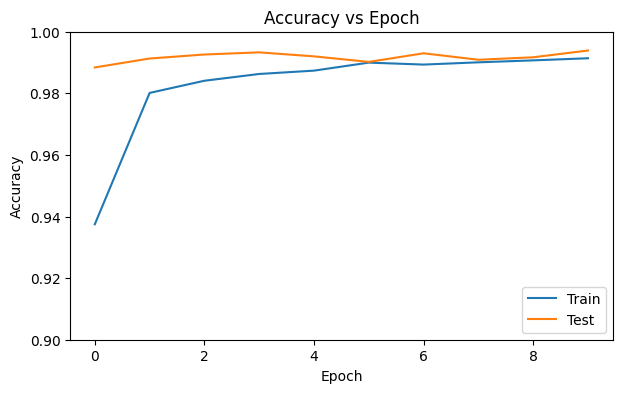

In [9]:
# Plot accuracy vs epoch
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(['Train', 'Test'],loc='lower right')
plt.savefig('accuracy_vs_epoch_Hybrid.png')

#### Plot: Loss vs Epoch

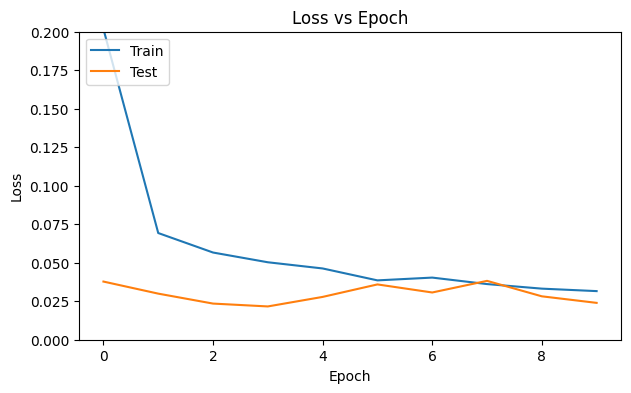

In [10]:
# Plot loss vs epoch
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='upper right')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss_vs_epoch_Hybrid.png')

plt.show()

### Visualising the Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


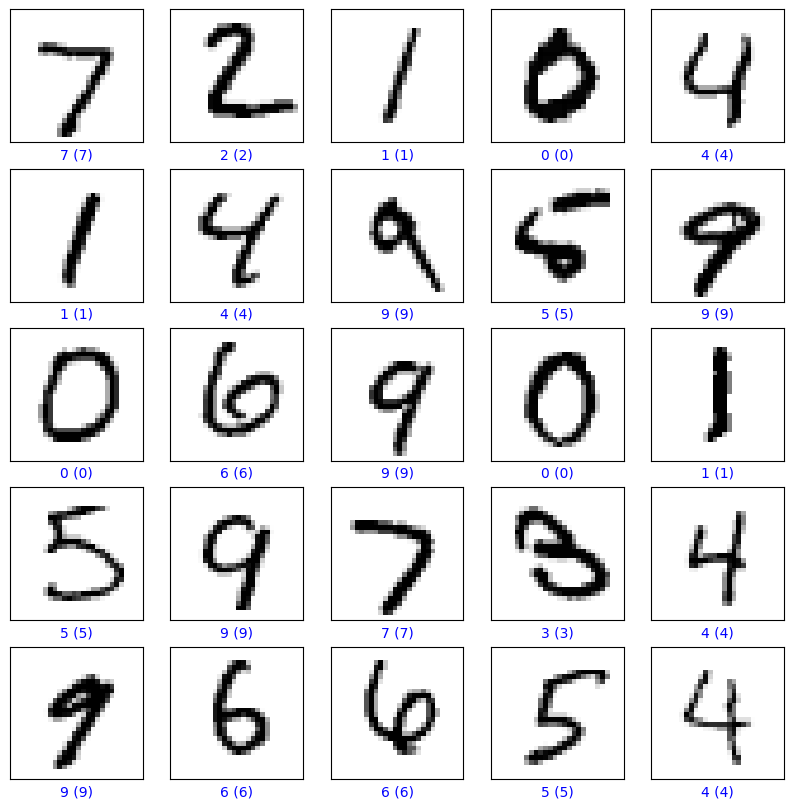

In [11]:
# Visualising the Predictions
# Make predictions
predictions = model.predict(test_images)

# Define class names
class_names = [str(i) for i in range(10)]

# Display some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.savefig('Predictions_Hybrid.png')
plt.show()


### Tabulating Classification Report

In [12]:
# Tabulating Classification Report
# One-hot encode the labels
train_labels_cat, test_labels_cat = to_categorical(train_labels), to_categorical(test_labels)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_labels



In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()*100

# Calculate accuracy for each class
report_df['accuracy'] = report_df.apply(lambda row: row['support'] * row['recall'] / row['support'] 
    if row.name in class_names else np.nan, axis=1)

# Remove accuracy, macro avg, and weighted avg rows
report_df = report_df.loc[class_names]

# Select and reorder columns
report_df = report_df[['accuracy', 'precision', 'recall', 'f1-score']]

# Round the DataFrame to 2 decimal places
report_df = report_df.round(2)


Accuracy: 99.39


In [14]:

# Display the classification report in a box format
print(tabulate(report_df, headers='keys', tablefmt='grid'))

# Optionally, save the table to a CSV file
report_df.to_csv('classification_report_Hybrid.csv', index=True)


+----+------------+-------------+----------+------------+
|    |   accuracy |   precision |   recall |   f1-score |
+====+============+=============+==========+============+
|  0 |      99.9  |       99.39 |    99.9  |      99.64 |
+----+------------+-------------+----------+------------+
|  1 |      99.74 |       99.56 |    99.74 |      99.65 |
+----+------------+-------------+----------+------------+
|  2 |      99.61 |       99.42 |    99.61 |      99.52 |
+----+------------+-------------+----------+------------+
|  3 |      99.11 |       99.7  |    99.11 |      99.4  |
+----+------------+-------------+----------+------------+
|  4 |      99.59 |       98.79 |    99.59 |      99.19 |
+----+------------+-------------+----------+------------+
|  5 |      99.1  |       98.66 |    99.1  |      98.88 |
+----+------------+-------------+----------+------------+
|  6 |      99.16 |       99.58 |    99.16 |      99.37 |
+----+------------+-------------+----------+------------+
|  7 |      99

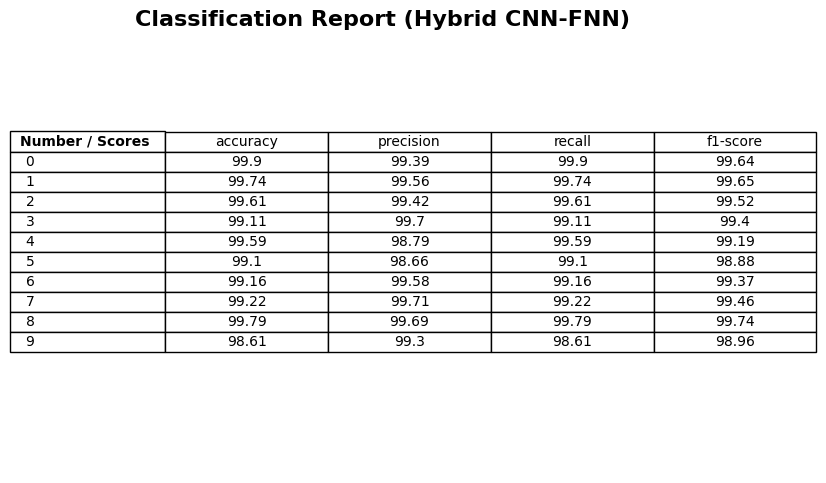

In [15]:

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(7, 6))  # Adjust the size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=report_df.values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 cellLoc='center',
                 loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Add corner label
table.add_cell(0, -1, width=0.15, height=0.045)
table[0, -1].set_text_props(text='Number / Scores', weight='bold')

# Add a title to the plot
plt.title('Classification Report (Hybrid CNN-FNN)', x=0.3, y=0.95, fontsize=16, fontweight='bold', ha='center')

# Save the table as an image
plt.savefig('classification_report_Hybrid.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()